## Time series

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.dates import DateFormatter

### Dataset analysis

In [3]:
# Define plotting utils
def plot_data(dataset, x, y, title="", xlabel="", ylabel=""):
    _, ax = plt.subplots(figsize=(12, 5))
    date_form = DateFormatter("%Y-%m-%d")
    ax.xaxis.set_major_formatter(date_form)
    plt.grid()
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    plt.plot(dataset[x], dataset[y])

def plot_data_aggregation(dataset, y, title="", xlabel="", ylabel=""):
    _, ax = plt.subplots(figsize=(12, 7))
    date_form = DateFormatter("%Y-%m-%d")
    ax.xaxis.set_major_formatter(date_form)
    plt.grid()
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    plt.plot(dataset[y])

In [4]:
# Upload datasets
datasets = {}
datasets["oil"] = pd.read_csv("data/oil.csv")
datasets["stores"] = pd.read_csv("data/stores.csv")
datasets["train"] = pd.read_csv("data/train.csv")
datasets["test"] = pd.read_csv("data/test.csv")
datasets["transactions"] = pd.read_csv("data/transactions.csv")
datasets["holidays"] = pd.read_csv("data/holidays_events.csv")

In [5]:
# Transform rows to datetime
for _, dataset in datasets.items():
    if "date" in dataset.columns:
        dataset["date"] = pd.to_datetime(dataset["date"])

##### Plot dataset information

First the training dataset is analysed.

Grocery I percentage: 31.990345987398417 %


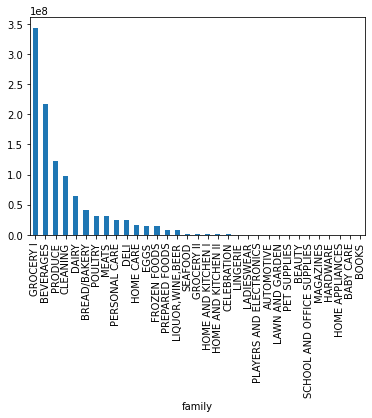

In [6]:
# Train data
sales = datasets["train"].groupby(datasets["train"]['family']).sales.sum().sort_values(ascending=False)
sales.plot(y=sales, kind='bar', legend=False)
grocery_percentage = sales["GROCERY I"] / sales.sum()
print(f"Grocery I percentage: {grocery_percentage * 100} %")

It is possible to see that groceries represents the most important source of sales of the enterprise with 31% of the total sales.

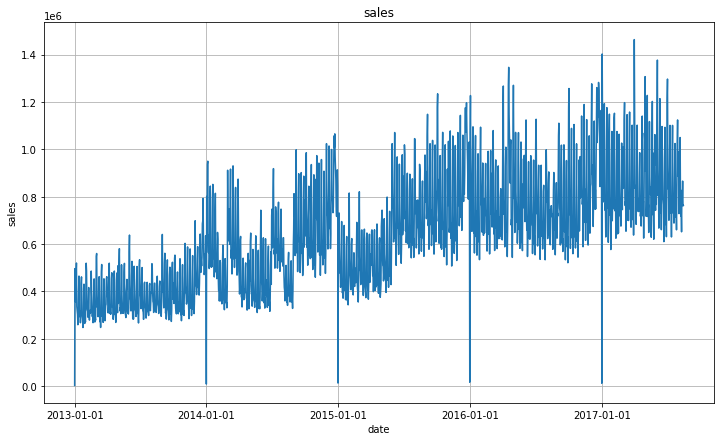

In [7]:
sales_per_day = datasets["train"].groupby(datasets["train"]['date'].dt.date).sum()
plot_data_aggregation(sales_per_day, "sales", title="sales", xlabel="date", ylabel="sales")

In the previous figure the total sales are plotted. We can see that the total sales were growing in the previous years. We can see that the minimum values are present in the first day of the year, the company is not selling goods during that day. There is a growth in the sales during the last months of the year. There is also a seasonal behavior of the series, repeting its shape each year. 

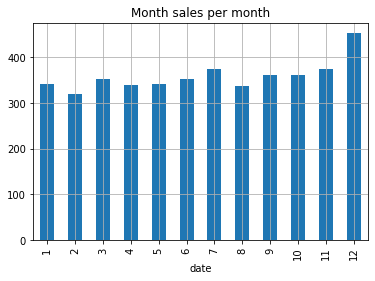

In [8]:
sales_per_month = (
    datasets["train"].groupby(datasets["train"]['date'].dt.month).sum() / 
    datasets["train"].groupby(datasets["train"]['date'].dt.month).count()
)
sales_per_month["sales"].plot(kind='bar', legend=False, title="Month sales per month")
plt.grid()


The month with the highest amount of sales is December, while the month with the lowest amount is February.

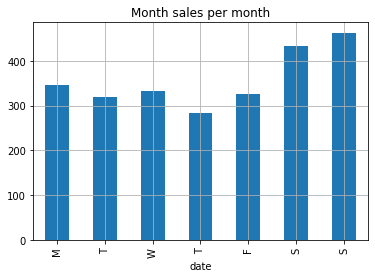

In [9]:
sales_per_week_day = (
    datasets["train"].groupby(datasets["train"]['date'].dt.weekday).sum() / 
    datasets["train"].groupby(datasets["train"]['date'].dt.weekday).count()
)
ax = sales_per_week_day["sales"].plot(kind='bar', legend=False, title="Month sales per month")
ax.set_xticklabels(["M", "T", "W", "T", "F", "S", "S"])
plt.grid()


The highest sales are made during Sunday

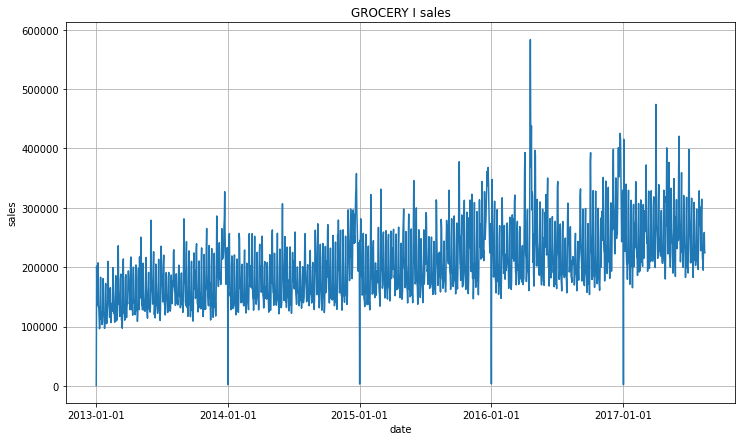

In [10]:
family = "GROCERY I"
sales_per_day = datasets["train"][datasets["train"]["family"] == family].groupby(datasets["train"]['date'].dt.date).sum()
plot_data_aggregation(sales_per_day, "sales", title=f"{family} sales", xlabel="date", ylabel="sales")

The Groceries I time series is plotted, it shows a similar behavior of the one representing the total sales.

<AxesSubplot:ylabel='Count'>

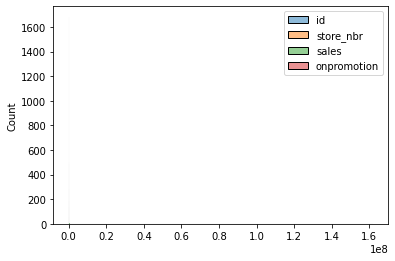

In [11]:
sns.histplot(sales_per_day)

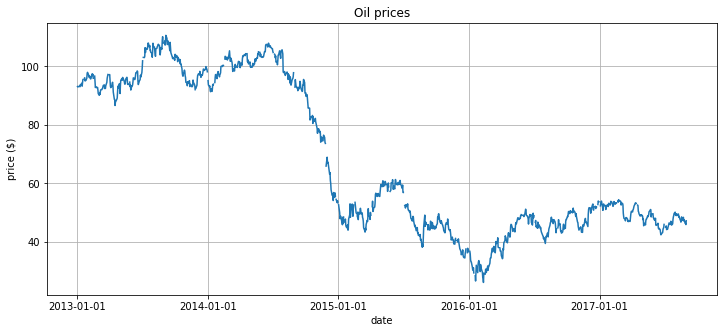

In [12]:
# Oil prices
plot_data(datasets["oil"], "date", "dcoilwtico", title="Oil prices", xlabel="date", ylabel="price ($)")

Equator's economy has a high dependency on the oil price, this dependency might have an impact on the amount of sales. The oil price had a big price drop during middle 2014, then it remained oscilating around a constant value. It had the lowest value in the beginning of 2016.

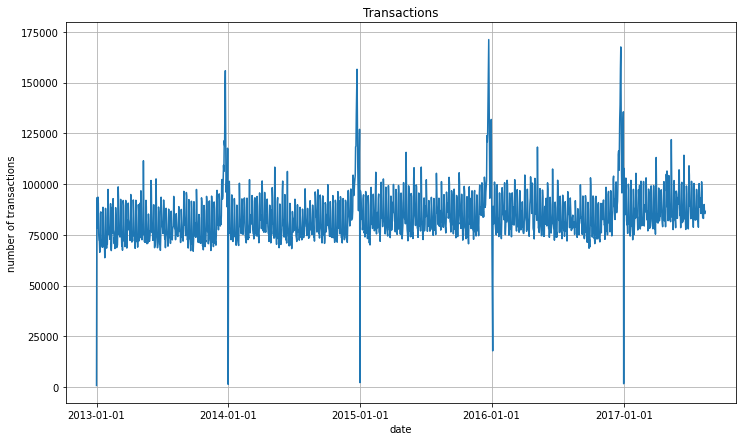

In [37]:
# Transaction prices
transaction_per_day = datasets["transactions"].groupby(datasets["transactions"]['date'].dt.date).sum()
plot_data_aggregation(transaction_per_day, "transactions", title="Transactions", xlabel="date", ylabel="number of transactions")


The number of transactions presents a seasonal behavior that repeats every year with a samll increase during the last years. The higher amount of transactions is made during December. 

<AxesSubplot:xlabel='transactions', ylabel='Count'>

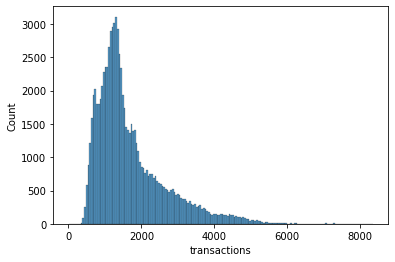

In [25]:
sns.histplot(datasets["transactions"]["transactions"])

c:\Users\gonza\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='transactions'>

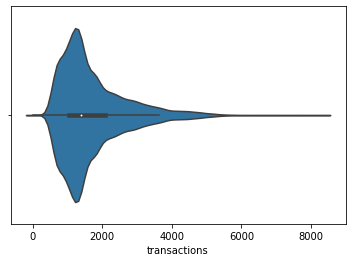

In [26]:
sns.violinplot(datasets["transactions"]["transactions"])

In the previous plots is possible to see the transaction distribution

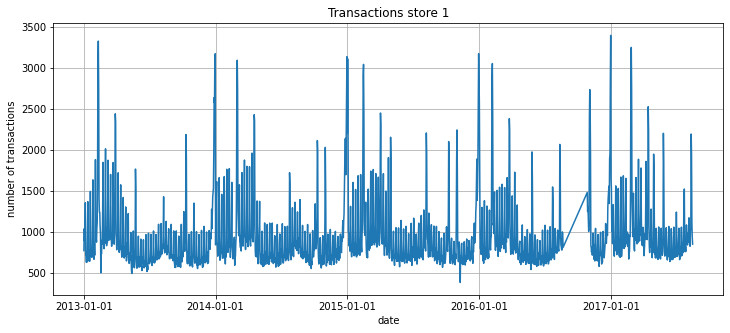

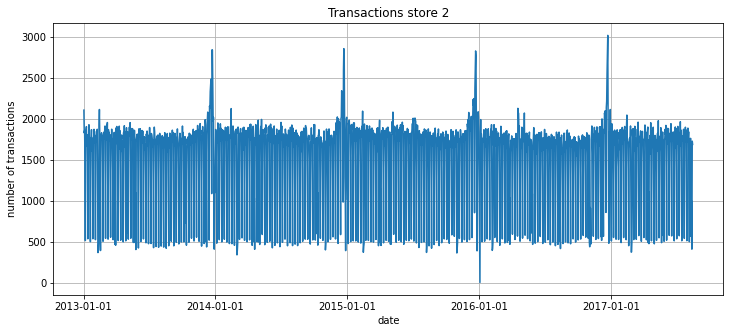

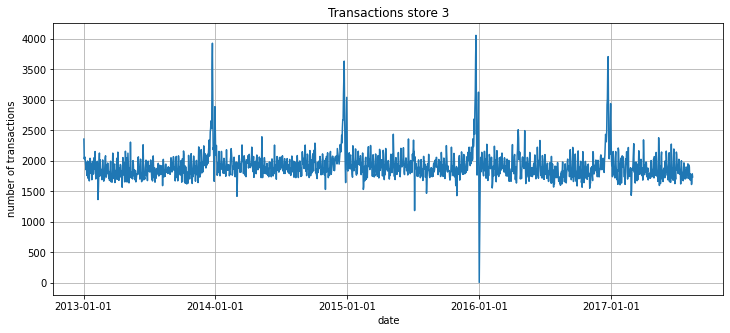

In [39]:
for i, value in enumerate(datasets["transactions"]["store_nbr"].unique()):
    transaction_per_store = datasets["transactions"][datasets["transactions"]["store_nbr"] == value]
    plot_data(transaction_per_store, "date", "transactions", title=f"Transactions store {i + 1}", xlabel="date", ylabel="number of transactions")
    if i == 2:
        break
    

Transaction of different stores are displayed, the same seasonal behaviour is resent in all shown stores with different means and variances.

<AxesSubplot:xlabel='cluster', ylabel='Count'>

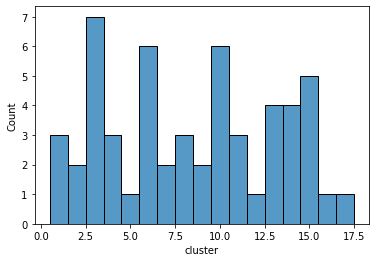

In [28]:
# Stores
sns.histplot(datasets["stores"]["cluster"], discrete=True)

The histogram shows the number of stores per cluster

<AxesSubplot:xlabel='city', ylabel='Count'>

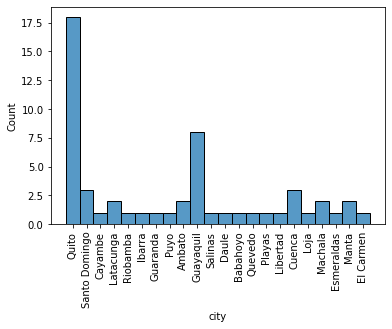

In [29]:
plt.xticks(rotation=90)
sns.histplot(datasets["stores"]["city"])

The histogram shows the number of stores per city

In [37]:
#sns.catplot(x="type", y="date", jitter=False, data=datasets["holidays"])

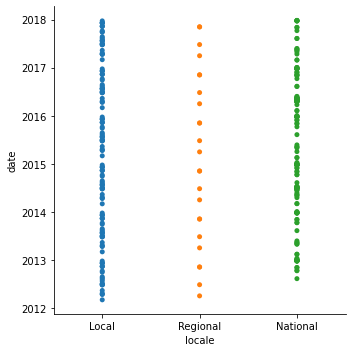

In [29]:
sns.catplot(x="locale", y="date", jitter=False, data=datasets["holidays"])

The scatter plots show the different types of holidays during the year